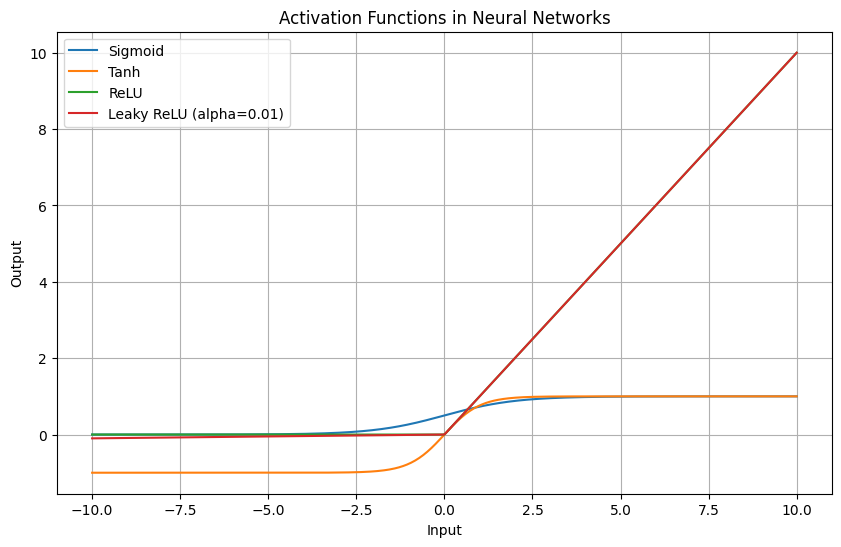

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Activation Functions Plot
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

x = np.linspace(-10, 10, 520)

sigmoid_y = sigmoid(x)
tanh_y = tanh(x)
relu_y = relu(x)
leaky_relu_y = leaky_relu(x)

plt.figure(figsize=(10, 6))
plt.plot(x, sigmoid_y, label="Sigmoid")
plt.plot(x, tanh_y, label="Tanh")
plt.plot(x, relu_y, label="ReLU")
plt.plot(x, leaky_relu_y, label="Leaky ReLU (alpha=0.01)")
plt.title("Activation Functions in Neural Networks")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np

# XOR Problem (Simple Backpropagation)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])

outputs = np.array([[0], [1], [1], [0]])

np.random.seed(1)
weights_input_hidden = np.random.rand(2, 2)
weights_hidden_output = np.random.rand(2, 1)
bias_hidden = np.random.rand(1, 2)
bias_output = np.random.rand(1, 1)

learning_rate = 0.1
epochs = 10000

for epoch in range(epochs):
    hidden_layer_input = np.dot(inputs, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    error = outputs - predicted_output
    output_gradient = sigmoid_derivative(predicted_output) * error
    hidden_gradient = sigmoid_derivative(hidden_layer_output) * np.dot(output_gradient, weights_hidden_output.T)

    weights_hidden_output += np.dot(hidden_layer_output.T, output_gradient) * learning_rate
    weights_input_hidden += np.dot(inputs.T, hidden_gradient) * learning_rate
    bias_output += np.sum(output_gradient, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(hidden_gradient, axis=0, keepdims=True) * learning_rate

    if (epoch + 1) % 1000 == 0:
        loss = np.mean(np.square(error))
        print(f"Epoch {epoch + 1}, Loss: {loss:.4f}")

print("\nFinal predictions:")
print(predicted_output)


Epoch 1000, Loss: 0.2500
Epoch 2000, Loss: 0.2497
Epoch 3000, Loss: 0.2483
Epoch 4000, Loss: 0.2363
Epoch 5000, Loss: 0.1898
Epoch 6000, Loss: 0.1278
Epoch 7000, Loss: 0.0324
Epoch 8000, Loss: 0.0129
Epoch 9000, Loss: 0.0075
Epoch 10000, Loss: 0.0051

Final predictions:
[[0.07304485]
 [0.93084242]
 [0.93122512]
 [0.07564609]]


In [ ]:
import numpy as np

#  Class-Based Neural Network (XOR again)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.bias_hidden = np.random.rand(1, hidden_size)
        self.bias_output = np.random.rand(1, output_size)
        self.learning_rate = 0.1

    def forward(self, inputs):
        self.hidden_layer_input = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = sigmoid(self.hidden_layer_input)

        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.predicted_output = sigmoid(self.output_layer_input)

        return self.predicted_output

    def backward(self, inputs, outputs, predicted_output):
        error = outputs - predicted_output

        output_gradient = sigmoid_derivative(predicted_output) * error

        hidden_gradient = sigmoid_derivative(self.hidden_layer_output) * np.dot(output_gradient, self.weights_hidden_output.T)

        self.weights_hidden_output += np.dot(self.hidden_layer_output.T, output_gradient) * self.learning_rate
        self.weights_input_hidden += np.dot(inputs.T, hidden_gradient) * self.learning_rate
        self.bias_output += np.sum(output_gradient, axis=0, keepdims=True) * self.learning_rate
        self.bias_hidden += np.sum(hidden_gradient, axis=0, keepdims=True) * self.learning_rate

inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])

outputs = np.array([[0], [1], [1], [0]])

nn = NeuralNetwork(input_size=2, hidden_size=2, output_size=1)

epochs = 10000
for epoch in range(epochs):
    predicted = nn.forward(inputs)
    nn.backward(inputs, outputs, predicted)
    if (epoch + 1) % 1000 == 0:
        loss = np.mean(np.square(outputs - predicted))
        print(f"Epoch {epoch + 1}, Loss: {loss:.4f}")

print("\nFinal predictions:")
print(nn.forward(inputs))


Epoch 1000, Loss: 0.2454
Epoch 2000, Loss: 0.2182
Epoch 3000, Loss: 0.1687
Epoch 4000, Loss: 0.0686
Epoch 5000, Loss: 0.0195
Epoch 6000, Loss: 0.0097
Epoch 7000, Loss: 0.0062
Epoch 8000, Loss: 0.0045
Epoch 9000, Loss: 0.0035
Epoch 10000, Loss: 0.0028

Final predictions:
[[0.05559786]
 [0.94915775]
 [0.94932665]
 [0.05459012]]


In [ ]:
import numpy as np

# ART1 Clustering
class ART1:
    def __init__(self, num_features, num_clusters, vigilance):
        self.num_features = num_features
        self.num_clusters = num_clusters
        self.vigilance = vigilance
        self.weights = np.ones((num_clusters, num_features))  # Initialize weights

    def train(self, inputs):
        for i, input_pattern in enumerate(inputs):
            input_pattern = np.array(input_pattern)
            match = False

            for j in range(self.num_clusters):
                activation = np.dot(self.weights[j], input_pattern)
                norm_input = np.sum(input_pattern)
                match_score = activation / norm_input

                if match_score > self.vigilance:
                    self.weights[j] = self.weights[j] * input_pattern
                    match = True
                    break

            if not match:
                print(f"Input pattern {i} did not match any cluster under vigilance.")

    def display_weights(self):
        print("Trained Cluster Weights:")
        for cluster_idx, weight in enumerate(self.weights):
            print(f"Cluster {cluster_idx}: {weight}")

inputs = [
    [1, 0, 1, 0, 1],
    [1, 0, 1, 0, 0],
    [1, 1, 0, 0, 1],
    [1, 0, 1, 0, 1]
]

num_features = len(inputs[0])
num_clusters = 3
vigilance = 0.8

art1 = ART1(num_features, num_clusters, vigilance)
art1.train(inputs)
art1.display_weights()


Trained Cluster Weights:
Cluster 0: [1. 0. 1. 0. 0.]
Cluster 1: [1. 1. 0. 0. 1.]
Cluster 2: [1. 0. 1. 0. 1.]
